Welcome to the Notebook.In this notebook we will work on a Customer Dataset 

In [1]:
#Importblock
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Reading training and test data files into dataframe 
df_train = pd.read_csv('uta_train.csv')
df_test = pd.read_csv('uta_test.csv')

In [3]:
#Checking dimensions of training and test data
#print("Test Data:")
#print(df.shape)
#print("Train Data:")
#print(df_train.shape)

In [4]:
#Lets take  a glimpse of data, and how it looks like:
df_train.head()

,account_id,number_contacts,it_spend_networking,decision_maker,email_acitivity,it_spend_cloud,it_spend_others,past_purchase_networking,number_employees_10K_50K,web_acitivity_cloud,...,competitor_1_cloud,competitor_1_networking,competitor_3_networking,industry_vertical_retail,paid_media_activity,industry_vertical_healthcare,persona_executive,persona_manager,purchase_event,persona_tech
0,37642,3,61303261.0,0,76,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
1,19806,1,38554008.0,0,53,519366,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,2427,0,16948797.0,0,16,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0
3,13073,1,0.0,1,33,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,56025,7,149449820.0,0,36,4713370,504320,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [5]:
#Looking at data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46332 entries, 0 to 46331
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   account_id                         46332 non-null  int64  
 1   number_contacts                    46332 non-null  int64  
 2   it_spend_networking                46332 non-null  float64
 3   decision_maker                     46332 non-null  int64  
 4   email_acitivity                    46332 non-null  int64  
 5   it_spend_cloud                     46332 non-null  int64  
 6   it_spend_others                    46332 non-null  int64  
 7   past_purchase_networking           46332 non-null  int64  
 8   number_employees_10K_50K           46332 non-null  int64  
 9   web_acitivity_cloud                46332 non-null  int64  
 10  industry_vertical_infrastructure   46332 non-null  int64  
 11  decision_headquarter               46332 non-null  int

In [6]:
#Checking Null values
df_train.isnull().sum().sum()

469

In [7]:
df_train.isnull().sum()

account_id                             0
number_contacts                        0
it_spend_networking                    0
decision_maker                         0
email_acitivity                        0
it_spend_cloud                         0
it_spend_others                        0
past_purchase_networking               0
number_employees_10K_50K               0
web_acitivity_cloud                    0
industry_vertical_infrastructure       0
decision_headquarter                   0
number_employees_1000_10K              0
industry_vertical_finance              0
competitor_2_networking                0
number_employess_less_than 1000        0
number_employees_greater_than_50K      0
decision_power                         0
chat_activity                          0
web_activity_networking                0
competitor_3_cloud                     0
past_purchase_cloud                    0
event_attendance                       0
competitor_2_cloud                     0
competitor_1_clo

We found that there are 469 null values in the whole dataset, all from column 'persona tech'.We will impute them using knn imputer.

In [8]:
#Using KNNImputer for 
imputer = KNNImputer(n_neighbors=4)
df_train = pd.DataFrame(imputer.fit_transform(df_train),columns = df_train.columns)


In [9]:
#Lets see how the column looks like now
df_train['persona_tech'].value_counts()

1.00    23112
0.00    22805
0.50      188
0.25      123
0.75      104
Name: persona_tech, dtype: int64

Since only 1 % rows had missing values we can get rid of this data by dropping the rows

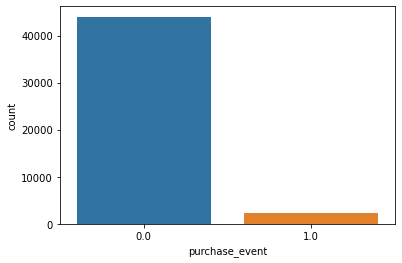

In [10]:
import seaborn as sns
ax = sns.countplot(x = 'purchase_event', data =df_train)

In [11]:
#X = df_train.drop(['account_id','purchase_event'],axis=1)
X = df_train.drop(['purchase_event'],axis=1)
Y = df_train['purchase_event']

In [12]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state = 90)

In [13]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [14]:
selected_feat= X_train.columns[(sel.get_support())]

In [15]:
X_train_new = X_train[selected_feat]
X_test_new = X_test[selected_feat]

In [16]:
df_upd = df_train[selected_feat]
df_upd['purchase_event'] = df_train['purchase_event']

<ipython-input-16-e8484177e8a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upd['purchase_event'] = df_train['purchase_event']


In [17]:
X_train.shape

(32432, 33)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train_new, Y_train)
clf.score(X_test_new, Y_test)

0.9569064748201439

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test_new)
confusion_matrix(Y_test, y_pred)

array([[13189,     4],
       [  595,   112]], dtype=int64)

In [20]:
from sklearn.metrics import precision_score
precision_score(Y_test, y_pred)

0.9655172413793104

In [21]:
#from imblearn.over_sampling import SMOTE
#from collections import Counter
#smote = SMOTE()
#
## fit predictor and target variable
#x_smote, y_smote = smote.fit_resample(X_train, Y_train)
#
#print('Original dataset shape', Counter(Y_train))
#print('Resample dataset shape', Counter(y_smote))

In [22]:
#x_smote['purchase_event']=y_smote

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from numpy import mean
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier

In [24]:
# init setup
from pycaret.classification import *
clf1 = setup(data = df_upd, target = 'purchase_event')

# compare models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9574,0.7106,0.1749,0.9914,0.2968,0.2858,0.4064,0.8090
lightgbm,Light Gradient Boosting Machine,0.9574,0.7412,0.1749,0.9868,0.2966,0.2856,0.4055,0.4630
gbc,Gradient Boosting Classifier,0.9571,0.7353,0.1754,0.9554,0.2960,0.2846,0.3990,2.4720
rf,Random Forest Classifier,0.9530,0.7004,0.1934,0.6486,0.2973,0.2802,0.3368,1.8880
et,Extra Trees Classifier,0.9517,0.6903,0.2198,0.5827,0.3188,0.2990,0.3380,0.9950
nb,Naive Bayes,0.9485,0.5163,0.0000,0.0000,0.0000,0.0000,0.0000,0.0350
ridge,Ridge Classifier,0.9485,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0360
qda,Quadratic Discriminant Analysis,0.9485,0.6194,0.0000,0.0000,0.0000,0.0000,0.0000,0.0540
lda,Linear Discriminant Analysis,0.9485,0.5611,0.0000,0.0000,0.0000,0.0000,0.0000,0.0420
dummy,Dummy Classifier,0.9485,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0260


In [25]:
#X = df_train.drop(['account_id','purchase_event'],axis=1)
X_test_actual = df_test[selected_feat]


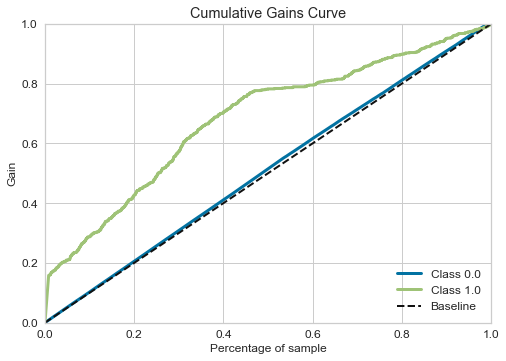

In [26]:
import scikitplot as skplt
y_probas = clf.predict_proba(X_test_new)
skplt.metrics.plot_cumulative_gain(Y_test, y_probas)
plt.show()